In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pandas.plotting import register_matplotlib_converters

In [3]:
import re

In [4]:
colnames = ['Price', 'ScreenSize', 'MaxScreenResolution', 'Processor', 'RAM',
       'HardDrive', 'GraphicsCoprocessor', 'ChipsetBrand',
       'CardDescription', 'WirelessType', 'NumberOfUSB2.0Ports',
       'NumberOfUSB3.0Ports', 'BrandName', 'Series', 'ItemModelNumber',
       'OperatingSystem', 'ItemWeight', 'ProductDimensions',
       'ItemDimensions_L_W_H', 'Color', 'ProcessorBrand',
       'ProcessorCount', 'ComputerMemoryType', 'FlashMemorySize',
       'HardDriveInterface', 'HardDriveRotationalSpeed',
       'OpticalDriveType', 'Batteries', 'ScreenResolution',
       'AverageBatteryLife', 'HardwarePlatform',
       'RearWebcamResolution', 'PowerSource', 'Voltage', 'MemorySpeed',
       'CaliforniaResidents', 'GraphicsCardRamSize',
       'NationalStockNumber', 'PackageDimensions', 'Audio-outPorts',
       'BatteryType']
amazon_data = pd.read_csv('bestbuy_product_infos.csv', sep='\t')#, names=colnames, index_col=False)#, encoding='unicode_escape')#, error_bad_lines=False)
amazon_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 168 columns):
Price__Price                                        object
Key Specs__Backlit Keyboard                         object
Key Specs__Screen Size                              object
Key Specs__Touch Screen                             object
Key Specs__Storage Type                             object
Key Specs__Total Storage Capacity                   object
Key Specs__eMMC Capacity                            object
Key Specs__System Memory (RAM)                      object
Key Specs__Graphics                                 object
Key Specs__Processor Speed (Base)                   object
Key Specs__Processor Model                          object
Key Specs__Processor Model Number                   object
Key Specs__Operating System                         object
Key Specs__Battery Type                             object
Key Specs__Solid State Drive Capacity               object
Key Spe

In [5]:
amazon_data.head(5)

,Price__Price,Key Specs__Backlit Keyboard,Key Specs__Screen Size,Key Specs__Touch Screen,Key Specs__Storage Type,Key Specs__Total Storage Capacity,Key Specs__eMMC Capacity,Key Specs__System Memory (RAM),Key Specs__Graphics,Key Specs__Processor Speed (Base),...,Camera__Front-Facing Camera,Camera__Front Facing Camera Megapixels,Camera__Front Facing Camera Video Resolution,Performance__Battery Life,Performance__System Memory (RAM),Performance__Processor Brand,Performance__Processor Model,Expansion__Number of M.2 Slots,"Expansion__Number Of Internal 2.5"" Bays",Expansion__Number Of eSATA Ports
0,Your price for this item is $119.00,No,11.6 inches,No,eMMC,32 gigabytes,32 gigabytes,4 gigabytes,None,1.04 gigahertz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Your price for this item is $279.99,No,15.6 inches,Yes,SSD,128 gigabytes,NaN,8 gigabytes,Intel UHD Graphics 620,2.1 gigahertz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Your price for this item is $349.99,No,15.6 inches,Yes,SSD,256 gigabytes,NaN,8 gigabytes,Intel UHD Graphics 620,1.6 gigahertz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Your price for this item is $349.00,Yes,14 inches,Yes,eMMC,64 gigabytes,64 gigabytes,8 gigabytes,Intel UHD Graphics 620,2.2 gigahertz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Your price for this item is $499.99,Yes,14 inches,Yes,SSD,256 gigabytes,NaN,8 gigabytes,None,1.6 gigahertz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
amazon_data.describe()

,General__Year of Release,Ports__Number of USB Ports (Total),Ports__Number of USB 2.0 Type A Ports,Ports__Number of USB 3.0 Type A Ports,Ports__Number of HDMI Outputs (Total),Ports__Number of USB 3.1 Type C Ports,Ports__Number of USB Type C Charging Ports,Ports__Number of USB 3.1 Type A Ports,Ports__Number of Thunderbolt Ports (Total),Ports__Number of Thunderbolt 3 Ports,...,Ports__Number of DisplayPort Ver. 1.3 Outputs,Memory__Number Of Memory Slots,Memory__Number of Memory Sticks Included,Connectivity__Bluetooth Version,Network__Number Of Ethernet Ports,Power__Charging Interface Generation/Version,Other__UPC,Expansion__Number of M.2 Slots,"Expansion__Number Of Internal 2.5"" Bays",Expansion__Number Of eSATA Ports
count,8.000000,936.000000,265.000000,714.000000,686.000000,518.000000,34.000000,111.000000,267.000000,257.000000,...,1.0,453.000000,293.000000,8.0,509.000000,3.0,1.041000e+03,45.000000,42.000000,7.000000
mean,2017.750000,2.642094,1.362264,2.095238,0.989796,1.353282,1.470588,2.018018,1.441948,1.529183,...,0.0,1.849890,1.491468,4.1,0.966601,3.0,5.416376e+11,1.911111,0.976190,0.714286
std,0.707107,0.863460,0.547801,0.843691,0.114168,0.701407,0.861123,0.539056,0.835874,0.901455,...,NaN,0.594578,0.761282,0.0,0.179852,0.0,3.141824e+11,0.900056,0.154303,0.487950
min,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,0.000000,4.1,0.000000,3.0,1.901984e+11,0.000000,0.000000,0.000000
25%,2018.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,0.0,2.000000,1.000000,4.1,1.000000,3.0,1.933863e+11,1.000000,1.000000,0.500000
50%,2018.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,0.0,2.000000,1.000000,4.1,1.000000,3.0,6.439076e+11,2.000000,1.000000,1.000000
75%,2018.000000,3.000000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.0,2.000000,2.000000,4.1,1.000000,3.0,8.416311e+11,3.000000,1.000000,1.000000
max,2018.000000,5.000000,4.000000,5.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,0.0,4.000000,4.000000,4.1,1.000000,3.0,8.898996e+11,3.000000,1.000000,1.000000


# Create df

In [7]:
bestbuy_df = pd.DataFrame()

# Price

In [8]:
amazon_data['Price__Price']

0         Your price for this item is $119.00
1         Your price for this item is $279.99
2         Your price for this item is $349.99
3         Your price for this item is $349.00
4         Your price for this item is $499.99
                        ...                  
1036      Your price for this item is $417.99
1037      Your price for this item is $229.99
1038      Your price for this item is $959.99
1039      Your price for this item is $664.99
1040    Your price for this item is $1,699.99
Name: Price__Price, Length: 1041, dtype: object

In [9]:
bestbuy_df['Price'] = amazon_data.Price__Price.str.extract(r"(\d+\,?\d?\d?\d?\d?\d?\.\d+)", expand=False)
bestbuy_df = bestbuy_df.dropna(axis=0, subset=['Price'])
prices = []
for price_ in bestbuy_df['Price']:
    prices.append(float(price_.replace(',', '')))
bestbuy_df['Price'] = prices
bestbuy_df['Price']

0        119.00
1        279.99
2        349.99
3        349.00
4        499.99
         ...   
1036     417.99
1037     229.99
1038     959.99
1039     664.99
1040    1699.99
Name: Price, Length: 1041, dtype: float64

In [10]:
bestbuy_df['Price'].max()

4299.99

In [11]:
bestbuy_df['Price'].min()

24.96

In [12]:
bestbuy_df['Price'].mean()

1051.6118059558116

In [13]:
# step_ = amazon_data['Price_pcs'].max()/3
# price_rank = []
# for price in amazon_data['Price_pcs']:
#     if price < step_:
#         price_rank.append(0)
#     elif price < step_*2:
#         price_rank.append(1)
#     else:
#         price_rank.append(2)
# amazon_data['Price_pcs'] = price_rank
# print('Null count: %d'%amazon_data['Price_pcs'].isna().values.sum())
# amazon_data['Price_pcs']

In [14]:
# amazon_data['Price_pcs'] = amazon_data.Price.str.extract(r"(\d+\.\d+)", expand=False)
# assert amazon_data['Price_pcs'].isna().values.sum()==amazon_data['Price'].isna().values.sum()
# amazon_data = amazon_data.dropna(axis=0, subset=['Price_pcs'])
# print('Null count: %d'%amazon_data['Price_pcs'].isna().values.sum())
# amazon_data['Price_pcs']

In [15]:
def get_num_labels(df):
    unique_labels = df['Price'].unique()
    dic = {lbs:0 for lbs in unique_labels}
    for label in df['Price']:
        dic[label] += 1
    return dic

Text(0, 0.5, 'Number of labels')

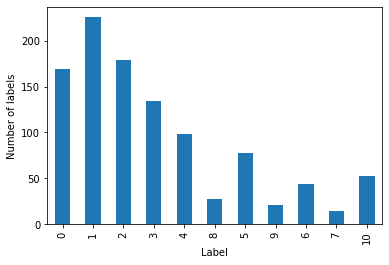

In [16]:
df = bestbuy_df.copy()
price_rank = []
for price in df['Price']:
    if price < 300:
        price_rank.append(0)
    elif price < 600:
        price_rank.append(1)
    elif price < 900:
        price_rank.append(2)
    elif price < 1200:
        price_rank.append(3)
    elif price < 1500:
        price_rank.append(4)
    elif price < 1800:
        price_rank.append(5)
    elif price < 2100:
        price_rank.append(6)
    elif price < 2200:
        price_rank.append(7)
    elif price < 2500:
        price_rank.append(8)
    elif price < 2800:
        price_rank.append(9)
    elif price < 32000:
        price_rank.append(10)
    elif price < 3500:
        price_rank.append(11)
    elif price < 3800:
        price_rank.append(12)
    elif price < 4100:
        price_rank.append(13)
    elif price < 4200:
        price_rank.append(14)
    else:
        price_rank.append(15)
df['Price'] = price_rank

lbs = get_num_labels(df)
pd.Series(lbs).plot.bar()
plt.xlabel("Label")
plt.ylabel("Number of labels")

Text(0, 0.5, 'Number of labels')

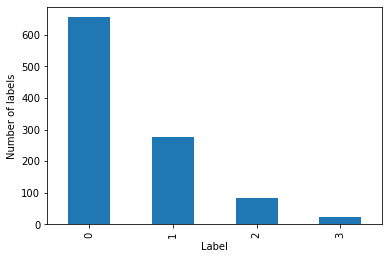

In [17]:
step = bestbuy_df['Price'].max()/4
df = bestbuy_df.copy()
price_rank = []
for price in df['Price']:
    if price < bestbuy_df['Price'].min()+step:
        price_rank.append(0)
    elif price < bestbuy_df['Price'].min()+step*2:
        price_rank.append(1)
    elif price < bestbuy_df['Price'].min()+step*3:
        price_rank.append(2)
    else:
        price_rank.append(3)
df['Price'] = price_rank

lbs = get_num_labels(df)
pd.Series(lbs).plot.bar()
plt.xlabel("Label")
plt.ylabel("Number of labels")

In [18]:
bestbuy_df = bestbuy_df[bestbuy_df['Price'] <= 3300]
bestbuy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 0 to 1040
Data columns (total 1 columns):
Price    1019 non-null float64
dtypes: float64(1)
memory usage: 15.9 KB


# Screen Size

In [19]:
amazon_data['Key Specs__Screen Size']

0       11.6 inches
1       15.6 inches
2       15.6 inches
3         14 inches
4         14 inches
           ...     
1036      14 inches
1037    11.6 inches
1038    17.3 inches
1039    13.3 inches
1040      17 inches
Name: Key Specs__Screen Size, Length: 1041, dtype: object

In [20]:
bestbuy_df['Key_Specs__Screen_Size'] = amazon_data['Key Specs__Screen Size'].str.extract(r"(\d+\.?\d+)", expand=False).astype(float)
print('Unique values: %d - Null count: %d'%(bestbuy_df['Key_Specs__Screen_Size'].nunique(), bestbuy_df['Key_Specs__Screen_Size'].isna().values.sum()))

Unique values: 21 - Null count: 0


In [21]:
bestbuy_df['Key_Specs__Screen_Size']

0       11.6
1       15.6
2       15.6
3       14.0
4       14.0
        ... 
1036    14.0
1037    11.6
1038    17.3
1039    13.3
1040    17.0
Name: Key_Specs__Screen_Size, Length: 1019, dtype: float64

# Touch screen

In [22]:
amazon_data['Key Specs__Touch Screen']

0        No
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
1036     No
1037    Yes
1038    Yes
1039    Yes
1040     No
Name: Key Specs__Touch Screen, Length: 1041, dtype: object

In [23]:
bestbuy_df['Key_Specs__Touch_Screen'] = amazon_data['Key Specs__Touch Screen'].str.lower()
print('Unique values: %d - Null count: %d'%(bestbuy_df['Key_Specs__Touch_Screen'].nunique(), bestbuy_df['Key_Specs__Touch_Screen'].isna().values.sum()))

Unique values: 2 - Null count: 9


# Storage type

In [24]:
amazon_data['Key Specs__Storage Type']

0       eMMC
1        SSD
2        SSD
3       eMMC
4        SSD
        ... 
1036     SSD
1037    eMMC
1038     SSD
1039     SSD
1040     SSD
Name: Key Specs__Storage Type, Length: 1041, dtype: object

In [25]:
bestbuy_df['Key_Specs__Storage_Type'] = amazon_data['Key Specs__Storage Type'].str.lower()
print('Unique values: %d - Null count: %d'%(bestbuy_df['Key_Specs__Storage_Type'].nunique(), bestbuy_df['Key_Specs__Storage_Type'].isna().values.sum()))

Unique values: 6 - Null count: 16


In [26]:
bestbuy_df['Key_Specs__Storage_Type']

0       emmc
1        ssd
2        ssd
3       emmc
4        ssd
        ... 
1036     ssd
1037    emmc
1038     ssd
1039     ssd
1040     ssd
Name: Key_Specs__Storage_Type, Length: 1019, dtype: object

# RAM

In [27]:
amazon_data['Key Specs__System Memory (RAM)']

0        4 gigabytes
1        8 gigabytes
2        8 gigabytes
3        8 gigabytes
4        8 gigabytes
            ...     
1036     8 gigabytes
1037     4 gigabytes
1038    16 gigabytes
1039     8 gigabytes
1040    16 gigabytes
Name: Key Specs__System Memory (RAM), Length: 1041, dtype: object

In [28]:
bestbuy_df['Key_Specs__System_Memory'] = amazon_data['Key Specs__System Memory (RAM)'].str.extract(r"(\d+)", expand=False).astype(float)
print('Unique values: %d - Null count: %d'%(bestbuy_df['Key_Specs__System_Memory'].nunique(), bestbuy_df['Key_Specs__System_Memory'].isna().values.sum()))

Unique values: 7 - Null count: 9


In [29]:
bestbuy_df['Key_Specs__System_Memory']

0        4.0
1        8.0
2        8.0
3        8.0
4        8.0
        ... 
1036     8.0
1037     4.0
1038    16.0
1039     8.0
1040    16.0
Name: Key_Specs__System_Memory, Length: 1019, dtype: float64

In [30]:
bestbuy_df['RAM_type'] = amazon_data['Memory__Type of Memory (RAM)'].str.lower()
print('Unique values: %d - Null count: %d'%(bestbuy_df['RAM_type'].nunique(), bestbuy_df['RAM_type'].isna().values.sum()))

Unique values: 11 - Null count: 9


In [31]:
bestbuy_df['RAM_speed'] = amazon_data['Memory__System Memory RAM Speed'].str.extract(r"(\d+)", expand=False).astype(float)
print('Unique values: %d - Null count: %d'%(bestbuy_df['RAM_speed'].nunique(), bestbuy_df['RAM_speed'].isna().values.sum()))

Unique values: 13 - Null count: 344


# Processor

In [32]:
amazon_data['Processor__Processor Model'].isna().values.sum()

9

In [33]:
bestbuy_df['Processor'] = amazon_data['Processor__Processor Model'].str.lower()
print('Unique values: %d - Null count: %d'%(bestbuy_df['Processor'].nunique(), bestbuy_df['Processor'].isna().values.sum()))

Unique values: 52 - Null count: 9


# Graphic

In [34]:
amazon_data['Graphics__Graphics'].isna().values.sum()

29

In [35]:
bestbuy_df['Graphics__Graphics'] = amazon_data['Graphics__Graphics'].str.lower()
print('Unique values: %d - Null count: %d'%(bestbuy_df['Graphics__Graphics'].nunique(), bestbuy_df['Graphics__Graphics'].isna().values.sum()))

Unique values: 76 - Null count: 29


# Screen resolution

In [36]:
amazon_data['Display__Screen Resolution']

0             1366 x 768 (HD)
1             1366 x 768 (HD)
2             1366 x 768 (HD)
3       1920 x 1080 (Full HD)
4       1920 x 1080 (Full HD)
                ...          
1036          1366 x 768 (HD)
1037          1366 x 768 (HD)
1038    1920 x 1080 (Full HD)
1039    1920 x 1080 (Full HD)
1040              2560 x 1600
Name: Display__Screen Resolution, Length: 1041, dtype: object

In [37]:
resolution = amazon_data['Display__Screen Resolution'].str.extract(r"(\d+)[ x]+(\d+)", expand=False).astype(float)
bestbuy_df['Screen_resolution1'] = resolution[0]
bestbuy_df['Screen_resolution2'] = resolution[1]
print('Unique values: %d - Null count: %d'%(bestbuy_df['Screen_resolution1'].nunique(), bestbuy_df['Screen_resolution1'].isna().values.sum()))
bestbuy_df['Screen_resolution1']

Unique values: 18 - Null count: 2


0       1366.0
1       1366.0
2       1366.0
3       1920.0
4       1920.0
         ...  
1036    1366.0
1037    1366.0
1038    1920.0
1039    1920.0
1040    2560.0
Name: Screen_resolution1, Length: 1019, dtype: float64

# Operating system

In [38]:
amazon_data['Key Specs__Operating System']

0                       Chrome OS
1       Windows 10 Home in S mode
2       Windows 10 Home in S mode
3                       Chrome OS
4                 Windows 10 Home
                  ...            
1036                   Windows 10
1037              Windows 10 Home
1038              Windows 10 Home
1039              Windows 10 Home
1040              Windows 10 Home
Name: Key Specs__Operating System, Length: 1041, dtype: object

In [39]:
bestbuy_df['Key_Specs__Operating_System'] = amazon_data['Key Specs__Operating System'].str.lower()
print('Unique values: %d - Null count: %d'%(bestbuy_df['Key_Specs__Operating_System'].nunique(), bestbuy_df['Key_Specs__Operating_System'].isna().values.sum()))

Unique values: 14 - Null count: 14


In [40]:
bestbuy_df['Key_Specs__Operating_System']

0                       chrome os
1       windows 10 home in s mode
2       windows 10 home in s mode
3                       chrome os
4                 windows 10 home
                  ...            
1036                   windows 10
1037              windows 10 home
1038              windows 10 home
1039              windows 10 home
1040              windows 10 home
Name: Key_Specs__Operating_System, Length: 1019, dtype: object

# Battery

In [41]:
amazon_data['Key Specs__Battery Type']

0           Lithium-ion
1           Lithium-ion
2           Lithium-ion
3       Lithium-polymer
4           Lithium-ion
             ...       
1036        Lithium-ion
1037    Lithium-polymer
1038        Lithium-ion
1039        Lithium-ion
1040        Lithium-ion
Name: Key Specs__Battery Type, Length: 1041, dtype: object

In [42]:
bestbuy_df['Key_Specs__Battery_Type'] = amazon_data['Key Specs__Battery Type'].str.lower()
print('Unique values: %d - Null count: %d'%(bestbuy_df['Key_Specs__Battery_Type'].nunique(), bestbuy_df['Key_Specs__Battery_Type'].isna().values.sum()))

Unique values: 6 - Null count: 0


In [43]:
bestbuy_df['Key_Specs__Battery_Type']

0           lithium-ion
1           lithium-ion
2           lithium-ion
3       lithium-polymer
4           lithium-ion
             ...       
1036        lithium-ion
1037    lithium-polymer
1038        lithium-ion
1039        lithium-ion
1040        lithium-ion
Name: Key_Specs__Battery_Type, Length: 1019, dtype: object

# General color

In [44]:
amazon_data['General__Color Category']

0        Black
1        Black
2        Black
3        White
4         Gold
         ...  
1036    Silver
1037       Red
1038    Silver
1039      Gray
1040      Gray
Name: General__Color Category, Length: 1041, dtype: object

In [45]:
bestbuy_df['General__Color_Category'] = amazon_data['General__Color Category'].str.lower()
print('Unique values: %d - Null count: %d'%(bestbuy_df['General__Color_Category'].nunique(), bestbuy_df['General__Color_Category'].isna().values.sum()))

Unique values: 13 - Null count: 0


In [46]:
bestbuy_df['General__Color_Category']

0        black
1        black
2        black
3        white
4         gold
         ...  
1036    silver
1037       red
1038    silver
1039      gray
1040      gray
Name: General__Color_Category, Length: 1019, dtype: object

# General Brand

In [47]:
amazon_data['General__Brand']

0       Samsung
1          Dell
2          Dell
3            HP
4            HP
         ...   
1036       Dell
1037       Acer
1038       Dell
1039       Dell
1040         LG
Name: General__Brand, Length: 1041, dtype: object

In [48]:
bestbuy_df['General__Brand'] = amazon_data['General__Brand'].str.lower()
print('Unique values: %d - Null count: %d'%(bestbuy_df['General__Brand'].nunique(), bestbuy_df['General__Brand'].isna().values.sum()))

Unique values: 17 - Null count: 2


# Feature

In [49]:
bestbuy_df['Feature__Keyboard_Touch_Screen'] = amazon_data['Feature__Keyboard Touch Screen'].str.lower()
print('Unique values: %d - Null count: %d'%(bestbuy_df['Feature__Keyboard_Touch_Screen'].nunique(), bestbuy_df['Feature__Keyboard_Touch_Screen'].isna().values.sum()))

Unique values: 3 - Null count: 243


In [50]:
bestbuy_df['Feature__Backlit_Keyboard'] = amazon_data['Feature__Backlit Keyboard'].str.lower()
print('Unique values: %d - Null count: %d'%(bestbuy_df['Feature__Backlit_Keyboard'].nunique(), bestbuy_df['Feature__Backlit_Keyboard'].isna().values.sum()))

Unique values: 2 - Null count: 15


In [51]:
bestbuy_df['Feature__Mac_Features'] = amazon_data['Feature__Mac Features'].str.lower()
print('Unique values: %d - Null count: %d'%(bestbuy_df['Feature__Mac_Features'].nunique(), bestbuy_df['Feature__Mac_Features'].isna().values.sum()))

Unique values: 5 - Null count: 952


# Port

In [52]:
bestbuy_df['Port_Number_USB_Ports'] = amazon_data['Ports__Number of USB Ports (Total)'].astype(float)
print('Unique values: %d - Null count: %d'%(bestbuy_df['Port_Number_USB_Ports'].nunique(), bestbuy_df['Port_Number_USB_Ports'].isna().values.sum()))

Unique values: 6 - Null count: 100


# Display

In [53]:
bestbuy_df['Display__Display_Type'] = amazon_data['Display__Display Type'].str.lower()
print('Unique values: %d - Null count: %d'%(bestbuy_df['Display__Display_Type'].nunique(), bestbuy_df['Display__Display_Type'].isna().values.sum()))

Unique values: 18 - Null count: 3


# Storage Capacity

In [54]:
bestbuy_df['Storage__eMMC_Capacity'] = amazon_data['Storage__eMMC Capacity'].str.extract(r"(\d+)", expand=False).astype(float)
bestbuy_df['Storage__eMMC_Capacity'].fillna(value=0.0, inplace=True)
print('Unique values: %d - Null count: %d'%(bestbuy_df['Storage__eMMC_Capacity'].nunique(), bestbuy_df['Storage__eMMC_Capacity'].isna().values.sum()))
bestbuy_df['Storage__eMMC_Capacity']

Unique values: 5 - Null count: 0


0       32.0
1        0.0
2        0.0
3       64.0
4        0.0
        ... 
1036     0.0
1037    64.0
1038     0.0
1039     0.0
1040     0.0
Name: Storage__eMMC_Capacity, Length: 1019, dtype: float64

In [55]:
bestbuy_df['Storage__Solid_State_Drive_Capacity'] = amazon_data['Storage__Solid State Drive Capacity'].str.extract(r"(\d+)", expand=False).astype(float)
bestbuy_df['Storage__Solid_State_Drive_Capacity'].fillna(value=0.0, inplace=True)
print('Unique values: %d - Null count: %d'%(bestbuy_df['Storage__Solid_State_Drive_Capacity'].nunique(), bestbuy_df['Storage__Solid_State_Drive_Capacity'].isna().values.sum()))
bestbuy_df['Storage__Solid_State_Drive_Capacity']

Unique values: 18 - Null count: 0


0         0.0
1       128.0
2       256.0
3         0.0
4       256.0
        ...  
1036    500.0
1037      0.0
1038    512.0
1039    256.0
1040    512.0
Name: Storage__Solid_State_Drive_Capacity, Length: 1019, dtype: float64

# Dimension

In [56]:
bestbuy_df['Dimension__Product_Depth'] = amazon_data['Dimension__Product Depth'].str.extract(r"(\d+\.?\d?\d?)", expand=False).astype(float)
print('Unique values: %d - Null count: %d'%(bestbuy_df['Dimension__Product_Depth'].nunique(), bestbuy_df['Dimension__Product_Depth'].isna().values.sum()))

Unique values: 99 - Null count: 33


In [57]:
bestbuy_df['Dimension__Product_Height'] = amazon_data['Dimension__Product Height'].str.extract(r"(\d+\.?\d?\d?)", expand=False).astype(float)
print('Unique values: %d - Null count: %d'%(bestbuy_df['Dimension__Product_Height'].nunique(), bestbuy_df['Dimension__Product_Height'].isna().values.sum()))

Unique values: 60 - Null count: 33


In [58]:
bestbuy_df['Dimension__Product_Weight'] = amazon_data['Dimension__Product Weight'].str.extract(r"(\d+\.?\d?\d?)", expand=False).astype(float)
print('Unique values: %d - Null count: %d'%(bestbuy_df['Dimension__Product_Weight'].nunique(), bestbuy_df['Dimension__Product_Weight'].isna().values.sum()))

Unique values: 212 - Null count: 52


In [59]:
bestbuy_df['Dimension__Product_Width'] = amazon_data['Dimension__Product Width'].str.extract(r"(\d+\.?\d?\d?)", expand=False).astype(float)
print('Unique values: %d - Null count: %d'%(bestbuy_df['Dimension__Product_Width'].nunique(), bestbuy_df['Dimension__Product_Width'].isna().values.sum()))

Unique values: 81 - Null count: 33


In [60]:
bestbuy_df['Dimension__Product_Height']

0       0.70
1       0.78
2       0.78
3       0.60
4       0.80
        ... 
1036    0.80
1037    0.80
1038    0.80
1039    0.70
1040    0.70
Name: Dimension__Product_Height, Length: 1019, dtype: float64

# Screen Size

In [61]:
amazon_data['Key Specs__Screen Size']

0       11.6 inches
1       15.6 inches
2       15.6 inches
3         14 inches
4         14 inches
           ...     
1036      14 inches
1037    11.6 inches
1038    17.3 inches
1039    13.3 inches
1040      17 inches
Name: Key Specs__Screen Size, Length: 1041, dtype: object

In [62]:
bestbuy_df['Key_Specs__Screen_Size'] = amazon_data['Key Specs__Screen Size'].str.extract(r"(\d+\.?\d+)", expand=False).astype(float)
print('Unique values: %d - Null count: %d'%(bestbuy_df['Key_Specs__Screen_Size'].nunique(), bestbuy_df['Key_Specs__Screen_Size'].isna().values.sum()))

Unique values: 21 - Null count: 0


In [63]:
bestbuy_df['Key_Specs__Screen_Size']

0       11.6
1       15.6
2       15.6
3       14.0
4       14.0
        ... 
1036    14.0
1037    11.6
1038    17.3
1039    13.3
1040    17.0
Name: Key_Specs__Screen_Size, Length: 1019, dtype: float64

In [64]:
bestbuy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 0 to 1040
Data columns (total 26 columns):
Price                                  1019 non-null float64
Key_Specs__Screen_Size                 1019 non-null float64
Key_Specs__Touch_Screen                1010 non-null object
Key_Specs__Storage_Type                1003 non-null object
Key_Specs__System_Memory               1010 non-null float64
RAM_type                               1010 non-null object
RAM_speed                              675 non-null float64
Processor                              1010 non-null object
Graphics__Graphics                     990 non-null object
Screen_resolution1                     1017 non-null float64
Screen_resolution2                     1017 non-null float64
Key_Specs__Operating_System            1005 non-null object
Key_Specs__Battery_Type                1019 non-null object
General__Color_Category                1019 non-null object
General__Brand                         1017 non-n

# Save ProProcess_Data

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
train_df, test_df= train_test_split(bestbuy_df, test_size=0.1, random_state=0)

In [67]:
train_df.to_csv('bestbuy_train_val_data_predict_price.csv', index=False)

In [68]:
# test_df = test_df.drop(['Price_pcs'], axis=1)

In [69]:
test_df.to_csv('bestbuy_test_data_predict_price.csv', index=False)